# 3. Annotations d'images et vérifications

Les images ont été annotées manuellement, à l'aide de [Label Studio](https://labelstud.io/) en local.

Installation et lancement à l'aide des commandes suivantes
```bash
# Installation
pip install -U label-studio
# Launcement
label-studio
```

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

Renommer les images et labels qui reviennent de Label Studio car elles ont un début d'identifiant uuid rajoutés avant les noms.

In [2]:
dirs_to_rename = ['../data/annotations/images/', '../data/annotations/labels/']

for dir in dirs_to_rename:
    for filename in os.listdir(dir):
        # Split the filename at the first occurrence of '-'
        parts = filename.split('-', 1)
        if len(parts) > 1 and '-' in parts[1]:
            new_filename = parts[1]
            old_filepath = os.path.join(dir, filename)
            new_filepath = os.path.join(dir, new_filename)
            os.rename(old_filepath, new_filepath)

Fonction pour afficher les bounding boxes, réalisée avec la coopération de ChatGPT 3.5 (_Plot the bounding boxes of a yolo formated bounding box onto its corresponding image_.)

In [3]:
def draw_bounding_boxes(image_path, label_path):
    # Ouvrir l'image et la numpyser
    with Image.open(image_path) as img:
        img_np = np.array(img)
        height, width, _ = img_np.shape

        # Lire les labels
        with open(label_path, 'r') as f:
            labels = f.readlines()

        fig, ax = plt.subplots(1)
        ax.imshow(img_np)

        for label in labels:
            # spliter les labels
            label_data = label.strip().split()
            # Ne pas garder la 1ère partie qui contient le 0 de la classe pool
            x_center, y_center, box_width, box_height = map(float, label_data[1:])

            # Convert YOLO format to matplotlib format
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            x1 = x_center - (box_width / 2)
            y1 = y_center - (box_height / 2)

            # Afficher un patch rouge sur l'image
            rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

        plt.show()

Exemples de quelques annotations

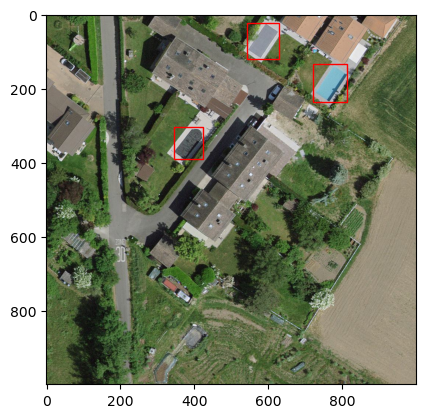

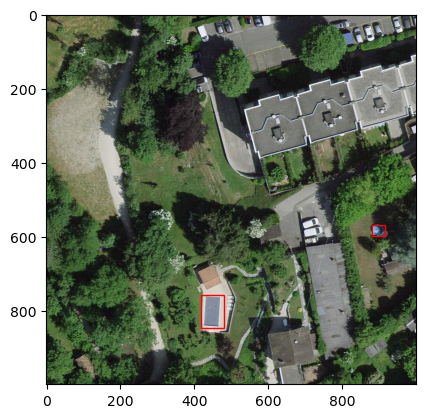

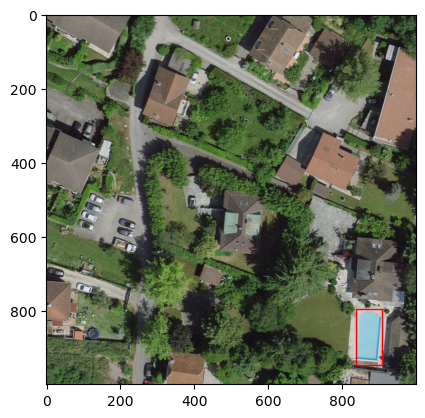

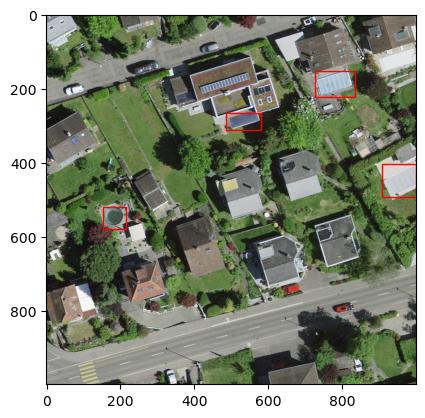

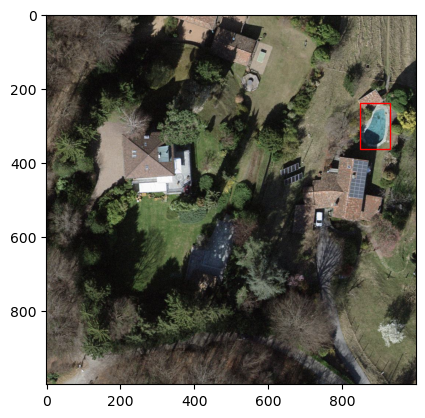

In [7]:
names = ['24980-11133', '24995-11142', '25046-11154', '26070-12667', '27142-10921']

for imname in names:
    impath = dirs_to_rename[0] + imname + '.jpg'
    labpath = dirs_to_rename[1] + imname + '.txt'
    draw_bounding_boxes(impath, labpath)